In [3]:
# We will import various libraries including key elements of nanoHUB's simtool library
#%load_ext yamlmagic
%matplotlib notebook

import os
import numpy as np
import scipy as sp

#for plotting
import matplotlib 
import random
import matplotlib.pyplot as plt
from matplotlib import rc
import re

import PIL.Image
from simtool import findInstalledSimToolNotebooks,searchForSimTool
from simtool import getSimToolInputs,getSimToolOutputs,Run

In [17]:
opticalprop = searchForSimTool('inabstool')
opticalprop

{'notebookPath': '/apps/inabstool/r16/simtool/inabstool.ipynb',
 'simToolName': 'inabstool',
 'simToolRevision': 'r16',
 'published': False}

In [19]:
# get the list of inputs for the simtool. This is an exhausitive list of inputs for SimTools.
inputs = getSimToolInputs(opticalprop)
#inputs

Parameter type Text does not have desc attribute.
Parameter type Text does not have desc attribute.
Parameter type Text does not have options attribute.
Parameter type Integer does not have desc attribute.
Parameter type Text does not have desc attribute.
Parameter type Text does not have desc attribute.
Parameter type Integer does not have desc attribute.
Parameter type Number does not have desc attribute.
Parameter type Integer does not have desc attribute.
Parameter type Integer does not have options attribute.
Parameter type Number does not have desc attribute.
Parameter type Number does not have desc attribute.
Parameter type Integer does not have desc attribute.
Parameter type Number does not have desc attribute.
Parameter type Integer does not have desc attribute.
Parameter type Integer does not have desc attribute.
Parameter type Integer does not have options attribute.
Parameter type Text does not have desc attribute.
Parameter type Text does not have desc attribute.
Parameter

In [24]:
outputs = getSimToolOutputs(opticalprop)
print(outputs)

freq:
    type: Array

epsix:
    type: Array

epsiy:
    type: Array

epsiz:
    type: Array

epsrx:
    type: Array

epsry:
    type: Array

epsrz:
    type: Array

k_extincx:
    type: Array

k_extincy:
    type: Array

k_extincz:
    type: Array

alpha_absx:
    type: Array

alpha_absy:
    type: Array

alpha_absz:
    type: Array



Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.


In [8]:
#Pseudopotential Selector aid
#Uncomment the below line to view available pseudopotentials that can be provided as inputs

#! ls ../data/pseudopotentials/sg15_oncv_upf_2jun20

In [25]:
inputs['pseudopotential'].file = '../data/pseudopotentials/sg15_oncv_upf_2jun20/Si_ONCV_PBE-1.2.upf'

inputs.scissor.value = 0.7
inputs.projections.value = "proj(1) = 'Si : sp3'"
inputs.nat.value = 2

print(inputs.projections.value)
print(inputs.scissor.value)
print(inputs.nat.value)

proj(1) = 'Si : sp3'
0.7
2


In [26]:
r = Run(opticalprop, inputs, cache= False)

runname = 7fb9b8bbe39e4773b5ab61a789866578
outdir  = RUNS/7fb9b8bbe39e4773b5ab61a789866578
cached  = False
submit --local /apps/share64/debian10/anaconda/anaconda-7/bin/papermill
       --no-request-save-on-cell-execute --autosave-cell-every 0
       --no-use-black-format-injection --parameters_file inputs.yaml
       /apps/inabstool/r16/simtool/inabstool.ipynb inabstool.ipynb


Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Text does not have desc attribute.
Parameter type Text does not have desc attribute.
Parameter type Text does not have options attribute.
Parameter type Integer does not have desc attribute.
Parameter type Text does not have desc attribute.
Parameter type Text does not have desc attribute.
Parameter type Integer does not

SimTool execution failed
The following outputs are missing: ['k_extincz', 'epsrx', 'k_extincx', 'epsiy', 'alpha_absx', 'epsiz', 'freq', 'alpha_absz', 'k_extincy', 'epsix', 'epsrz', 'epsry', 'alpha_absy']


Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.
Parameter type Array does not have desc attribute.


In [8]:
r.getResultSummary()

,name,data,encoder,display,filename


In [9]:
alpha_abs_list = r.read('alpha_absx') #choose to load in whatever crystal direction desired from outputs

alpha_absx is not available in results


<IPython.core.display.Javascript object>


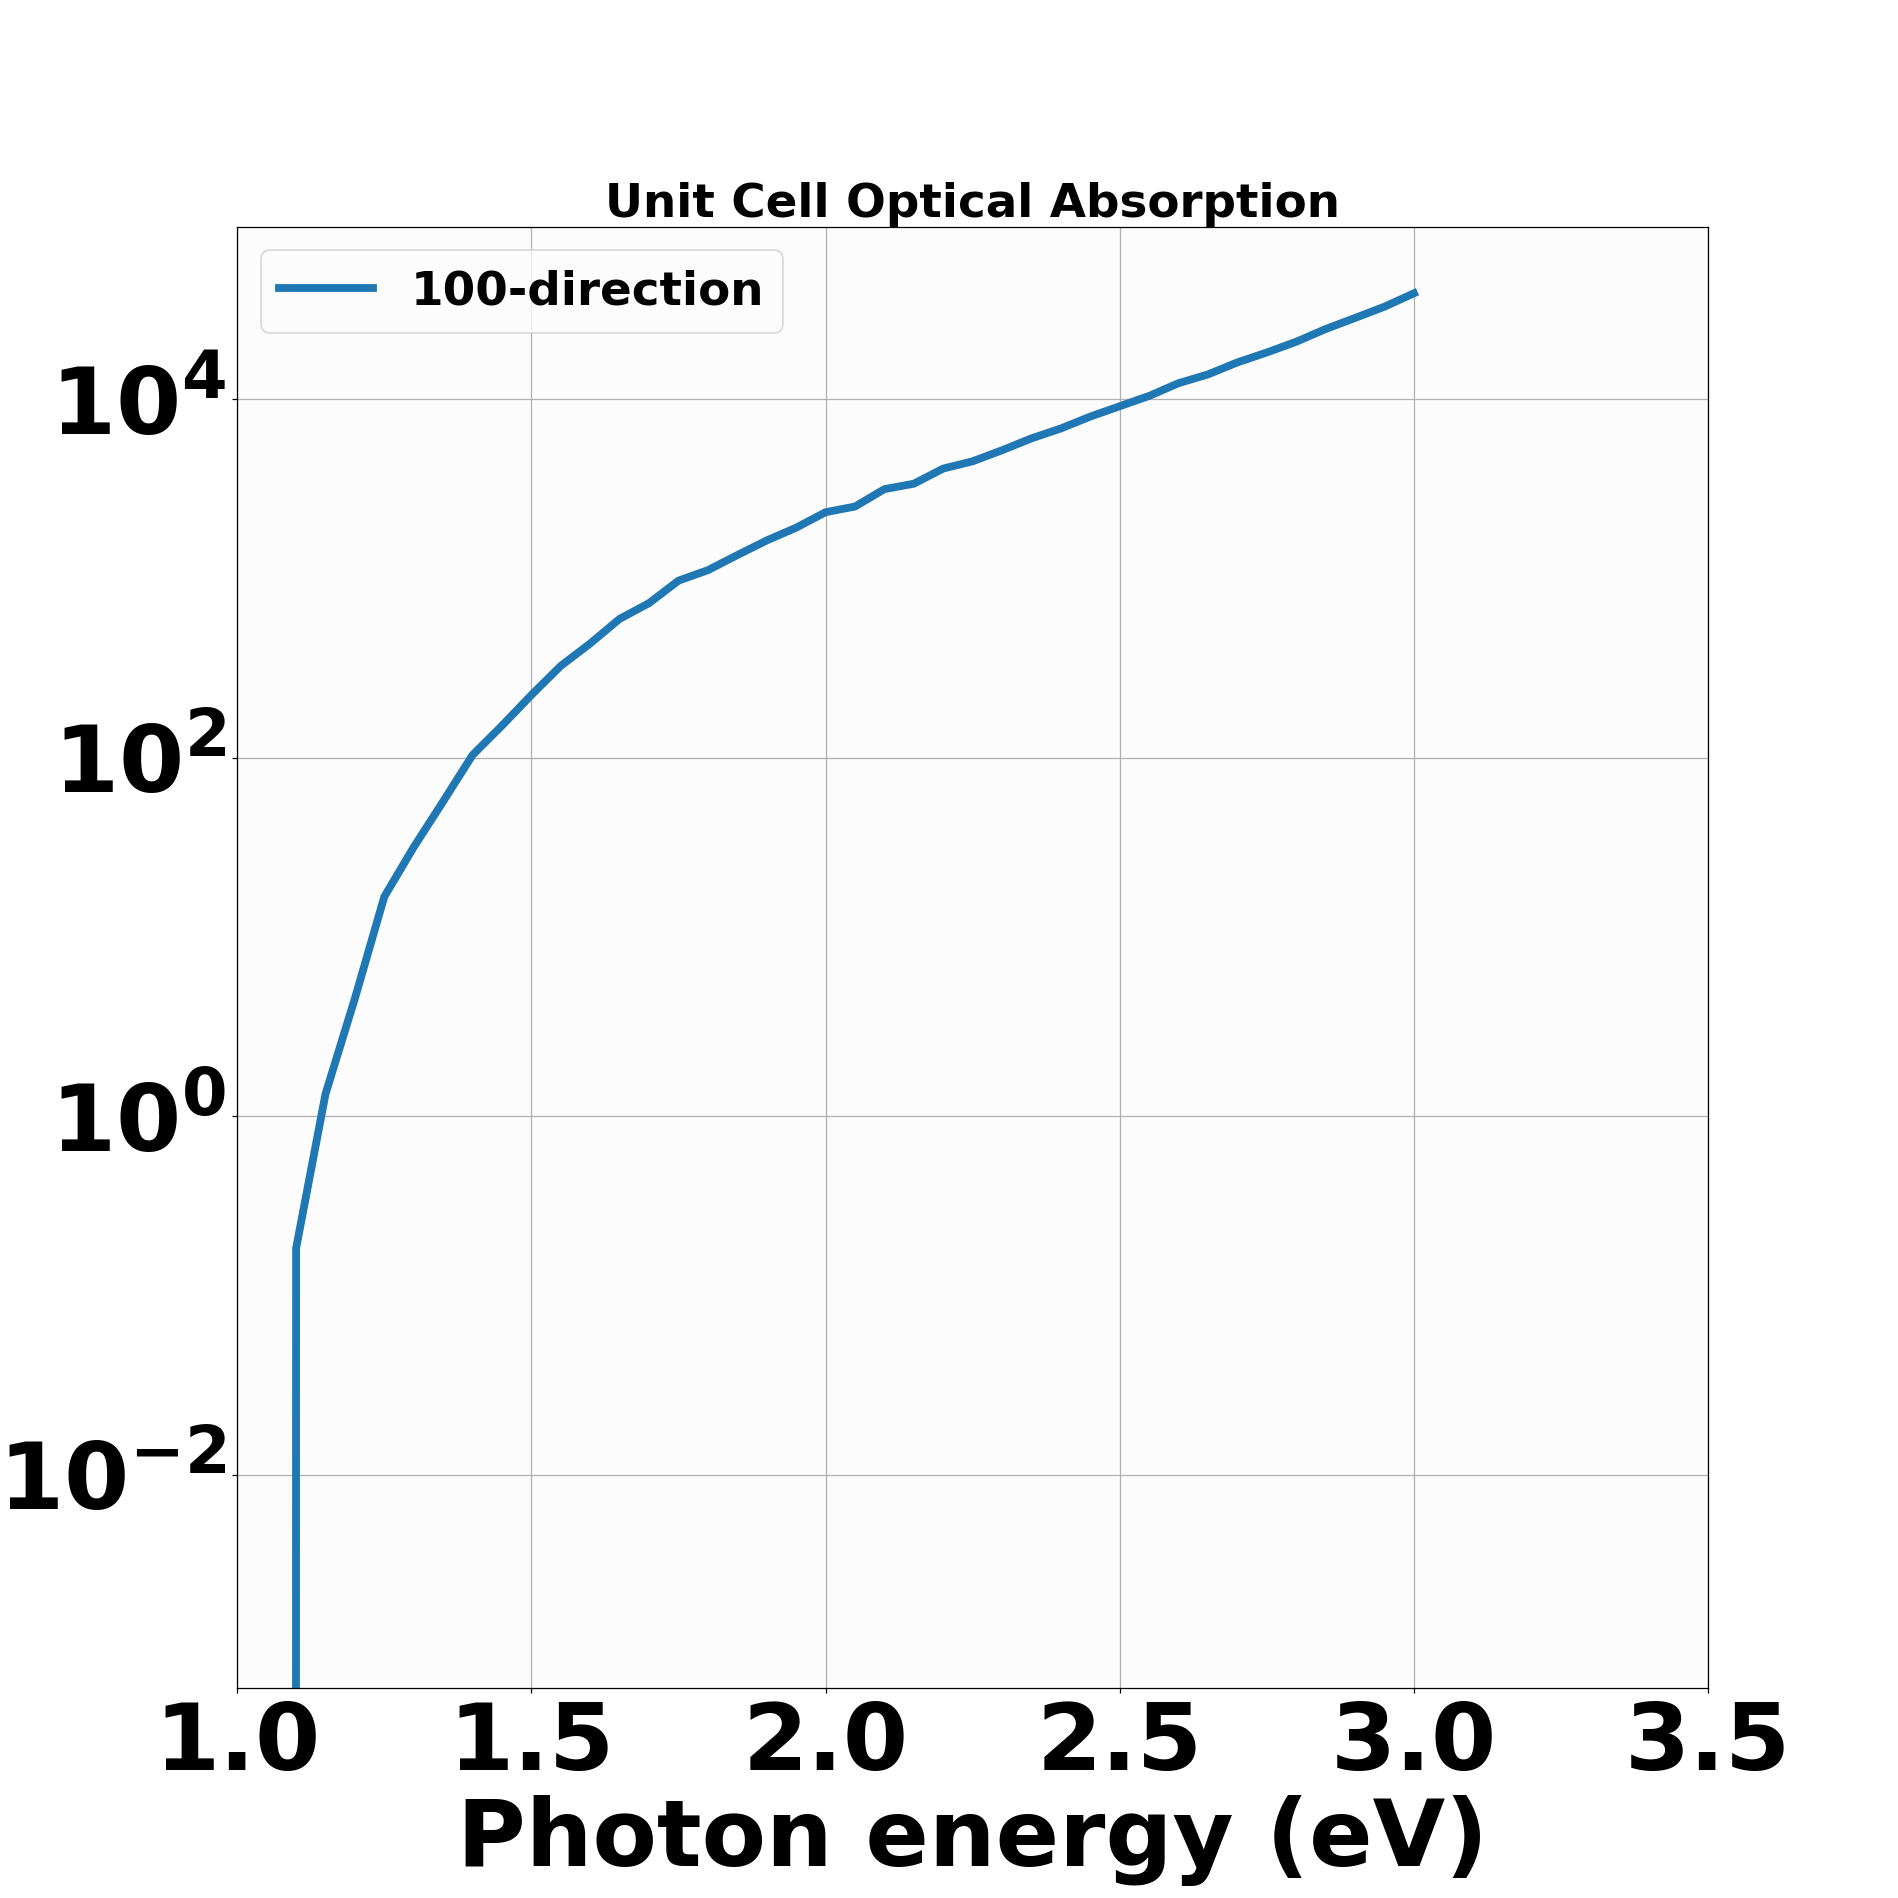

In [64]:
freq = r.read('freq')



rc('font', size=60, weight='bold')
rc('lines', linewidth=5)
rc('axes', labelsize=60, labelweight='bold', titlesize=30, titleweight='bold', facecolor='.990', grid=True)
rc('xtick', labelsize=60)
rc('ytick', labelsize=60)
rc('legend', fontsize=30)
rc('figure', figsize=[15,15])

fig, ax = plt.subplots(1,1, figsize=[15,15])

ax.plot(freq, alpha_abs_list, label='100-direction') #change label to appropriate crystal direction
#ax.plot(freq,epsiy, label='Imaginary 010')
#ax.plot(freq,epsiz, label='Imaginary 001')

ax.set_xlabel('Photon energy (eV)')
ax.set_ylabel('Absorption (cm-1)')
ax.set_title('Unit Cell Optical Absorption')
ax.legend()

#ax.axvline(.25, color='k')
#ax.text(.26, 1e2, 'Si Indirect Gap, computed', fontsize=30, color='k')
#ax.axvline(2.31, color='tab:orange')
#ax.text(2.32, 1e4, 'Si Direct Gap, computed', fontsize=30, color='tab:orange')
#ax.axvline(2.31+.7, color='tab:orange', linestyle='dotted')
#ax.axvline(.26+.7, color='k', linestyle='dotted')

#ax.axvline(1.1,color ='tab:red') #experimenal measurment
#ax.text(1.2, 1e4, 'Si Indirect Band Gap', fontsize=30, color ='tab:red')
##ax.grid(b=True,which='both')
#ax.axvline(3.4, color='tab:gray') #experimenal measurment
#ax.text(3.4, 1e2, 'Si Direct Gap', fontsize=30, color='tab:gray')


ax.set_xlim(1, 3.5)
#ax.set_ylim(1e-1,1e6)
plt.yscale('log')
#fig.savefig('/home/nanohub/tswolfe/Images/epw_with-phon_alpha_qe_si_usews_mtgipaw35rydcutoff.png', dpi='figure', orientation='landscape', transparent=False, bbox_inches='tight')#, pad_inches=0.1, frameon=None, metadata=None, facecolor='w', edgecolor='w'

In [15]:
!squeue -u w014fxu

/bin/bash: squeue: command not found
